In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ini_data = pd.read_csv('ini_data_info_jan29.csv')

In [3]:
tot_pop_region = pd.pivot_table(ini_data, values=['tot_pop'], aggfunc='sum', columns=['wbreg'])
tot_pop_region

wbreg,EAP,ECA,LAC,MNA,SAS,SSA
tot_pop,1.837120e+09,2.008185e+08,4.924424e+08,1.600540e+08,1.542719e+09,6.955929e+08


In [4]:
countries_per_reg = dict(zip(np.unique(ini_data['wbreg']), np.unique(ini_data['wbreg'], return_counts=True)[1]))
countries_per_reg

{'EAP': 12, 'ECA': 14, 'LAC': 20, 'MNA': 6, 'SAS': 7, 'SSA': 34}

In [5]:
completeness_check = pickle.load( open( "survey_completeness_check.p", "rb" ) )
completeness_check.keys()

dict_keys(['complete', 'not_complete', 'not_working'])

In [6]:
ini_data_ok = ini_data.loc[ini_data.countrycode.isin(completeness_check['complete'])]
tot_pop_region_ok = pd.pivot_table(ini_data_ok, values=['tot_pop'], aggfunc='sum', columns=['wbreg'])
tot_pop_region_ok

wbreg,EAP,LAC,MNA,SAS,SSA
tot_pop,2.478159e+08,2.185031e+08,4.094098e+07,3.313667e+08,5.222472e+08


In [7]:
del tot_pop_region['ECA']
tot_pop_region

wbreg,EAP,LAC,MNA,SAS,SSA
tot_pop,1.837120e+09,4.924424e+08,1.600540e+08,1.542719e+09,6.955929e+08


In [8]:
regions = tot_pop_region.columns
tot_pop_region = tot_pop_region.values[0]
tot_pop_region_ok = tot_pop_region_ok.values[0]

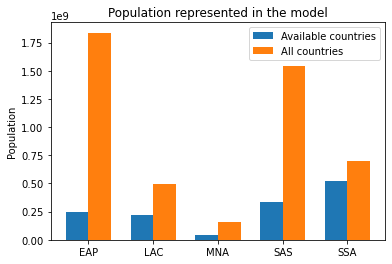

In [9]:
x = np.arange(len(regions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tot_pop_region_ok, width, label='Available countries')
rects2 = ax.bar(x + width/2, tot_pop_region, width, label='All countries')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Population represented in the model')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()

In [10]:
countries_per_reg_ok = dict(zip(np.unique(ini_data_ok['wbreg']), np.unique(ini_data_ok['wbreg'], return_counts=True)[1]))
countries_per_reg_ok

{'EAP': 4, 'LAC': 4, 'MNA': 2, 'SAS': 4, 'SSA': 19}

In [11]:
countries_per_reg_ok = list(countries_per_reg_ok.values())
countries_per_reg_ok.insert(1, 0)
countries_per_reg = list(countries_per_reg.values())

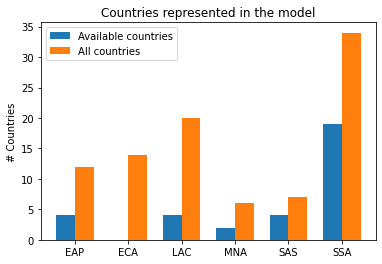

In [12]:
regions = list(regions)
regions.insert(1, 'ECA')
x = np.arange(len(regions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, countries_per_reg_ok, width, label='Available countries')
rects2 = ax.bar(x + width/2, countries_per_reg, width, label='All countries')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# Countries')
ax.set_title('Countries represented in the model')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()

In [19]:
wbccodes = pd.read_csv('wbccodes2014.csv')

In [29]:
#missing countries

for reg in np.unique(ini_data['wbreg']):
    all_countries = list(ini_data.loc[ini_data['wbreg']==reg]['countrycode'])
    available_countries = list(ini_data_ok.loc[ini_data_ok['wbreg']==reg]['countrycode'])
    
    for country in available_countries:
        all_countries.remove(country)
        
    remaining_countries = []
    for country in all_countries:
        try:
            remaining_countries.append(wbccodes.loc[wbccodes['country']==country]['country_name'].values[0])
        except:
            pass
        
    print('======================= '+reg+' =======================')
    print(all_countries)
    print(remaining_countries)
    print('\n')

======================= EAP =======================
['CHN', 'FSM', 'IDN', 'KHM', 'LAO', 'MNG', 'SLB', 'TLS']
['China', 'Micronesia, Fed. Sts.', 'Indonesia', 'Cambodia', 'Lao PDR', 'Mongolia', 'Solomon Islands']


======================= ECA =======================
['ALB', 'AZE', 'BIH', 'GEO', 'HUN', 'KGZ', 'MDA', 'MKD', 'ROU', 'SRB', 'TJK', 'TKM', 'TUR', 'UKR']
['Albania', 'Azerbaijan', 'Bosnia and Herzegovina', 'Georgia', 'Hungary', 'Kyrgyz Republic', 'Moldova', 'Macedonia, FYR', 'Serbia', 'Tajikistan', 'Turkmenistan', 'Turkey', 'Ukraine']


======================= LAC =======================
['ARG', 'BLZ', 'BOL', 'CRI', 'ECU', 'GUY', 'HND', 'HTI', 'JAM', 'MEX', 'PAN', 'PER', 'PRY', 'SLV', 'SUR', 'VEN']
['Argentina', 'Belize', 'Bolivia', 'Costa Rica', 'Ecuador', 'Guyana', 'Honduras', 'Haiti', 'Jamaica', 'Mexico', 'Panama', 'Peru', 'Paraguay', 'El Salvador', 'Suriname', 'Venezuela, RB']


======================= MNA =======================
['EGY', 'LBN', 'SYR', 'YEM']
['Egypt, Arab Rep

In [31]:
#available countries

for reg in np.unique(ini_data['wbreg']):
    available_countries = list(ini_data_ok.loc[ini_data_ok['wbreg']==reg]['countrycode'])
        
    remaining_countries = []
    for country in available_countries:
        try:
            remaining_countries.append(wbccodes.loc[wbccodes['country']==country]['country_name'].values[0])
        except:
            pass
        
    print('======================= '+reg+' =======================')
    print(available_countries)
    print(remaining_countries)
    print('\n')

======================= EAP =======================
['PHL', 'PNG', 'THA', 'VNM']
['Philippines', 'Papua New Guinea', 'Thailand', 'Vietnam']


======================= ECA =======================
[]
[]


======================= LAC =======================
['BRA', 'DOM', 'GTM', 'NIC']
['Brazil', 'Dominican Republic', 'Guatemala', 'Nicaragua']


======================= MNA =======================
['MAR', 'TUN']
['Morocco', 'Tunisia']


======================= SAS =======================
['BGD', 'BTN', 'LKA', 'PAK']
['Bangladesh', 'Bhutan', 'Sri Lanka', 'Pakistan']


======================= SSA =======================
['AGO', 'BDI', 'BFA', 'BWA', 'CIV', 'CMR', 'ETH', 'GHA', 'MOZ', 'MRT', 'NER', 'NGA', 'SLE', 'SWZ', 'TGO', 'TZA', 'UGA', 'COD', 'ZMB']
['Angola', 'Burundi', 'Burkina Faso', 'Botswana', "Cote d'Ivoire", 'Cameroon', 'Ethiopia', 'Ghana', 'Mozambique', 'Mauritania', 'Niger', 'Nigeria', 'Sierra Leone', 'Swaziland', 'Togo', 'Tanzania', 'Uganda', 'Zambia']


